### 数据读取

In [3]:
import pandas as pd
import os

filepath="listings.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath))
print(df.shape)
print("--"*15)
os.chdir(pwd)
features=["accommodates","bedrooms","bathrooms","beds","price","minimum_nights","maximum_nights","number_of_reviews"]
data=df[features]
print(data.shape)
print("--"*15)
print(data.head(4))

(3723, 92)
------------------------------
(3723, 8)
------------------------------
   accommodates  bedrooms  bathrooms  beds    price  minimum_nights  \
0             4       1.0        1.0   2.0  $160.00               1   
1             6       3.0        3.0   3.0  $350.00               2   
2             1       1.0        2.0   1.0   $50.00               2   
3             2       1.0        1.0   1.0   $95.00               1   

   maximum_nights  number_of_reviews  
0            1125                  0  
1              30                 65  
2            1125                  1  
3            1125                  0  


### price为预测指标
### number_of_reviews为评论数

In [4]:
import numpy as np

my_acc_value=3
data["acc_distance"]=np.abs(data.accommodates-my_acc_value)
data.acc_distance.value_counts().sort_index()

D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0      461
1     2294
2      503
3      279
4       35
5       73
6       17
7       22
8        7
9       12
10       2
11       4
12       6
13       8
Name: acc_distance, dtype: int64

### 洗牌sample

In [5]:
data=data.sample(frac=1,random_state=0)
data=data.sort_values("acc_distance")
data.price.head(5)

2645     $75.00
2825    $120.00
2145     $90.00
2541     $50.00
3349    $105.00
Name: price, dtype: object

### 数据格式转换（object转float，将￥符号去掉）

In [6]:
data["price"]=data.price.str.strip("$")
data["price"]=data.price.str.replace(",","")
data["price"]=data.price.astype(float)
print(data.price)
mean_price=data.price.iloc[:5].mean()
print(mean_price)

2645      75.0
2825     120.0
2145      90.0
2541      50.0
3349     105.0
2228     117.0
1122     176.0
2311     117.0
625      150.0
2312     100.0
2419     119.0
2421     139.0
131      215.0
3343      99.0
976       95.0
2376     170.0
3625      80.0
2700     120.0
1499      94.0
103      249.0
670      121.0
2957     120.0
1715      90.0
2857      98.0
421       50.0
3340      80.0
230      289.0
2579     135.0
710       89.0
880      175.0
         ...  
542      340.0
529      600.0
1878      99.0
2995     595.0
3272     599.0
3305    2000.0
1326     375.0
1656     283.0
1875      99.0
808      215.0
571      720.0
3524     295.0
685      399.0
1403     599.0
562      599.0
1658     283.0
657      500.0
2688     749.0
1850     180.0
1806     330.0
2106     499.0
2757     245.0
611     1250.0
1818      10.0
1402    1200.0
763     1000.0
2560      60.0
1594    1250.0
1224     499.0
1596     299.0
Name: price, Length: 3723, dtype: float64
88.0


# 6.2   模型的评估

### 分训练集与测试集

In [7]:
data.drop("acc_distance",axis=1)
train_set=data.copy().iloc[:2792]
test_set=data.copy().iloc[2792:]

### 基于单变量预测价格

In [8]:
def predict_price(new_listing_value,feature_column):
    temp_df=train_set
    temp_df["distance"]=np.abs(data[feature_column]-new_listing_value)
    temp_df=temp_df.sort_values("distance")
    knn_5=temp_df.price.iloc[:5]
    predicted_price=knn_5.mean()
    return predicted_price

In [9]:
test_set["predicted_price"]=test_set.accommodates.apply(predict_price,feature_column="accommodates")
#print(test_set["predicted_price"])

### 这样得到了测试集中所有房子的价格了

### 均方根误差

In [10]:
test_set["squared_error"]=(test_set["predicted_price"]-test_set["price"])**(2)
mse=test_set["squared_error"].mean()
rmse=mse**(1/2)
rmse

212.98927967051543

### 这只是一个变量的模型评估得分，那么，不同的变量是否有不同的效果？

In [11]:
for feature in ["accommodates","bedrooms","bathrooms","number_of_reviews"]:
    test_set["predicted_price"]=test_set[feature].apply(predict_price,feature_column=feature)
    test_set["squared_error"]=(test_set["predicted_price"]-test_set["price"])**(2)
    mse=test_set["squared_error"].mean()
    rmse=mse**(1/2)
    rmse
    print("RMSE for the {} column:{}".format(feature,rmse))

RMSE for the accommodates column:212.98927967051543
RMSE for the bedrooms column:199.80935328065033
RMSE for the bathrooms column:230.24716705684227
RMSE for the number_of_reviews column:235.91327066995507


## 6.3  数据预处理（标准化及归一化）

In [12]:
import pandas as pd
from sklearn.preprocessing import  StandardScaler

filepath="C:\\Users\\ma\\Desktop\\唐宇迪-机器学习课程\\机器学习算法配套案例实战\\K近邻\\listings.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath))
os.chdir(pwd)
features=["accommodates","bedrooms","bathrooms","beds","price","minimum_nights","maximum_nights","number_of_reviews"]
data=df[features]
print(data.shape)
print("--"*15)
data["price"]=data.price.str.strip("$")
data["price"]=data.price.str.replace(",","")
data["price"]=data.price.astype(float)

data=data.dropna()
print(data.shape)

data[features]=StandardScaler().fit_transform(data[features])

normalized_data=data
print(data.shape)
normalized_data.head(5)

(3723, 8)
------------------------------
(3671, 8)
(3671, 8)


D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anzhuangruanjian\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,0.401420,-0.249501,-0.439211,0.297386,0.081119,-0.341421,-0.016575,-0.516779
1,1.399466,2.129508,2.969551,1.141704,1.462622,-0.065047,-0.016606,1.706767
2,-1.095648,-0.249501,1.265170,-0.546933,-0.718699,-0.065047,-0.016575,-0.482571
3,-0.596625,-0.249501,-0.439211,-0.546933,-0.391501,-0.341421,-0.016575,-0.516779
4,0.401420,-0.249501,-0.439211,-0.546933,-0.718699,1.316824,-0.016575,-0.516779


## 6.5  多变量KNN模型

In [13]:
norm_train_set=normalized_data.copy().iloc[:2792]
norm_test_set=normalized_data.copy().iloc[2792:]

###  多变量距离的计算 （用scipy包）

### distance.euclidean计算欧式距离

In [14]:
from scipy.spatial import distance

#随机取两个样本，计算其距离
first_data=normalized_data.iloc[0][["accommodates","bathrooms"]]
fifth_data=normalized_data.iloc[20][["accommodates","bathrooms"]]
first_fifth_distance=distance.euclidean(first_data,fifth_data)
first_fifth_distance

3.7230196040170322

### 多变量KNN模型（distance.cdist计算距离）

In [15]:

#def predict_price_multivariate(new_value,feature_columns):
  #  temp_df=norm_train_set
   # temp_df["distance"]=distance.cdist(temp_df[feature_columns],new_value[feature_columns])
    #temp_df=temp_df.sort_values("distance")
    #knn_5=temp_df.price.iloc[:5]
    #predicted_price=knn_5.mean()
    
    #return predicted_price

#cols=["accommodates","bathrooms"]
#norm_test_set["predicted_price"]=norm_test_set[cols].apply(predict_price_multivariate,feature_columns=cols,axis=1)
#norm_test_set["squared_error"]=(norm_test_set["predicted_price"]-norm_test_set["price"])**(2)
#mse=norm_test_set["squared_error"].mean()
#rmse=mse**(1/2)

### 使用sklearn完成KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor
cols=["accommodates","bathrooms"]
#KNN实例化
knn=KNeighborsRegressor()
#模型训练
knn.fit(norm_train_set[cols],norm_train_set["price"])
#模型测试
two_features_predictions=knn.predict(norm_test_set[cols])

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

two_features_mse=mean_squared_error(norm_test_set["price"],two_features_predictions)
two_features_rmse=two_features_mse**(1/2)
print(two_features_rmse)

0.857101359199


### 加入更多的特征

In [20]:
cols=["accommodates","bedrooms","bathrooms","beds","minimum_nights","maximum_nights","number_of_reviews"]
#KNN实例化
knn=KNeighborsRegressor()
#模型训练
knn.fit(norm_train_set[cols],norm_train_set["price"])
#模型测试
seven_features_predictions=knn.predict(norm_test_set[cols])
seven_features_mse=mean_squared_error(norm_test_set["price"],seven_features_predictions)
seven_features_rmse=seven_features_mse**(1/2)
print(seven_features_rmse)

0.824383853088


##  6.4  sklearn库与功能

In [21]:
import pandas as pd
import numpy as np
import os

filepath="C:\\Users\\ma\\Desktop\\唐宇迪-机器学习课程\\winequality-red.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath),sep=';')
print(df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## 标准化用sklearn库的preprocessing.StandardScaler()方法

## 归一化用sklearn库的preprocessing.MinMaxScaler()方法

In [22]:
from sklearn import preprocessing

std_scale=preprocessing.StandardScaler().fit(df[["alcohol","fixed acidity"]])
df_std=std_scale.transform(df[["alcohol","fixed acidity"]])

minmax_scale=preprocessing.MinMaxScaler().fit(df[["alcohol","fixed acidity"]])
df_minmax=minmax_scale.transform(df[["alcohol","fixed acidity"]])

## 标准化后数据的均值为0，方差为1

In [23]:
print("Mean after standardization:\nAlcohol={:.2f},fixed acidity={:.2f}"
      .format(df_std[:,0].mean(),df_std[:,1].mean()))
print("Standard deviation after standardization:\nAlcohol={:.2f},fixed acidity={:.2f}"
      .format(df_std[:,0].std(),df_std[:,1].std()))

Mean after standardization:
Alcohol=0.00,fixed acidity=0.00
Standard deviation after standardization:
Alcohol=1.00,fixed acidity=1.00


## 归一化后数据的最小值为0，最大值为1

In [24]:
print("Min-value after min-max scaling:\nAlcohol={:.2f},fixed acidity={:.2f}"
      .format(df_minmax[:,0].min(),df_minmax[:,1].min()))
print("Max-value after min-max scaling:\nAlcohol={:.2f},fixed acidity={:.2f}"
      .format(df_minmax[:,0].max(),df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00,fixed acidity=0.00
Max-value after min-max scaling:
Alcohol=1.00,fixed acidity=1.00


## Plotting

In [25]:
%matplotlib inline

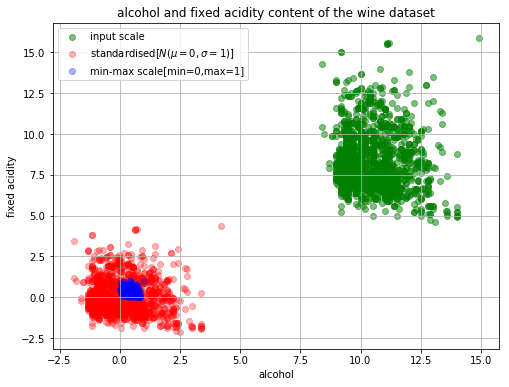

In [26]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(df["alcohol"],df["fixed acidity"],
               color="green",label="input scale",alpha=0.5)
    
    plt.scatter(df_std[:,0],df_std[:,1],
               color="red",label="standardised[$N (\mu=0,\sigma=1)$]",alpha=0.3)
    
    plt.scatter(df_minmax[:,0],df_minmax[:,1],
               color="blue",label="min-max scale[min=0,max=1]",alpha=0.3)
    
    plt.title("alcohol and fixed acidity content of the wine dataset")
    plt.xlabel("alcohol")
    plt.ylabel("fixed acidity")
    plt.legend(loc="upper left")
    plt.grid()
    
plot()
plt.show()